In [1]:
import os
import ultralytics
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [2]:
# 예측된 레이블 로그만 찍어주는 코드드

import os

# 학습된 모델 가져오기
model = YOLO("runs/detect/2nd_open_reo_8_n_1660/weights/best.pt")

# 테스트 파일 폴더경로
folder_path = 'iloveimg-converted'

# 폴더에 있는 모든 파일 가져오기
files = os.listdir(folder_path)

# 가져온 파일 목록을 예측하기
for file in files:
    filepath = 'iloveimg-converted/' + file
    results = model(filepath) 
    


image 1/1 c:\Users\SBA\repository\image_detection\iloveimg-converted\IMG_1284.jpg: 640x480 1 hush, 23.0ms
Speed: 6.0ms preprocess, 23.0ms inference, 160.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\SBA\repository\image_detection\iloveimg-converted\IMG_1285.jpg: 640x480 1 hush, 1 eclipse, 5.0ms
Speed: 3.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\SBA\repository\image_detection\iloveimg-converted\IMG_1286.jpg: 640x480 1 hush, 1 eclipse, 4.0ms
Speed: 2.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\SBA\repository\image_detection\iloveimg-converted\IMG_1287.jpg: 640x480 1 hush, 1 eclipse, 4.0ms
Speed: 2.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\SBA\repository\image_detection\iloveimg-converted\IMG_1288.jpg: 640x480 (no detections), 5.0ms
Speed: 2.0ms preprocess, 5.0ms inference

In [4]:
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# 학습된 모델 가져오기
model = YOLO("runs/detect/2nd_open_reo_8_n_1660/weights/best.pt")

# 클래스 이름 리스트
class_name = ['snack', 'hershey', 'eclipse']

# 테스트 파일 폴더경로
folder_path = 'test_snack_detect'

# 폴더에 있는 모든 파일 가져오기
files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]  # 이미지 파일만 선택

# 가져온 파일 목록을 예측하고 시각화
for file in files:
    filepath = os.path.join(folder_path, file)
    org_image = cv2.imread(filepath)
    resized_image = cv2.resize(org_image, (860, 600))
    height, width, _ = resized_image.shape

    # 모델 예측
    results = model(resized_image)  # YOLO 모델을 사용하여 예측 실행
    # print(results)

    # Matplotlib을 사용한 시각화를 위한 바운딩 박스 데이터 저장
    predicted_boxes = []
    predicted_labels = []
    predicted_scores = []

    # 각 이미지에 대한 모든 예측 결과를 순회하여 바운딩 박스 좌표와 정보를 추출
    for result in results:
        for box in result.boxes:
            # 바운딩 박스 좌표 추출
            x_min, y_min, x_max, y_max = box.xyxy[0].tolist()

            # 좌표 값을 이미지 크기에 맞게 정수로 변환
            x_min = max(0, int(x_min))
            y_min = max(0, int(y_min))
            x_max = min(width, int(x_max))
            y_max = min(height, int(y_max))

            confidence = box.conf.item()
            label = int(box.cls.item())

            # 예측된 바운딩 박스, 레이블, 점수 저장
            predicted_boxes.append([x_min, y_min, x_max, y_max])
            predicted_labels.append(label)
            predicted_scores.append(confidence)

    # Matplotlib을 사용한 시각화
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)) 
    ax = plt.gca()

    # 바운딩 박스와 레이블 추가
    for box, label, score in zip(predicted_boxes, predicted_labels, predicted_scores):
        x_min, y_min, x_max, y_max = box
        width, height = x_max - x_min, y_max - y_min

        # 레이블 이름으로 변환
        label_name = class_name[label]

        # 바운딩 박스 그리기
        rect = plt.Rectangle((x_min, y_min), width, height, edgecolor='red', facecolor='none', linewidth=2)
        ax.add_patch(rect)

        # 레이블과 신뢰도 점수 추가
        plt.text(x_min, y_min - 10, f'{label_name}: {score:.2f}', color='red', fontsize=12,
                 bbox=dict(facecolor='white', alpha=0.6))

    plt.axis('off')
    plt.title(f'Predictions for {file}')
    plt.show()


NotImplementedError: Could not run 'torchvision::nms' with arguments from the 'CUDA' backend. This could be because the operator doesn't exist for this backend, or was omitted during the selective/custom build process (if using custom build). If you are a Facebook employee using PyTorch on mobile, please visit https://fburl.com/ptmfixes for possible resolutions. 'torchvision::nms' is only available for these backends: [CPU, Meta, QuantizedCPU, BackendSelect, Python, FuncTorchDynamicLayerBackMode, Functionalize, Named, Conjugate, Negative, ZeroTensor, ADInplaceOrView, AutogradOther, AutogradCPU, AutogradCUDA, AutogradXLA, AutogradMPS, AutogradXPU, AutogradHPU, AutogradLazy, AutogradMeta, Tracer, AutocastCPU, AutocastXPU, AutocastCUDA, FuncTorchBatched, BatchedNestedTensor, FuncTorchVmapMode, Batched, VmapMode, FuncTorchGradWrapper, PythonTLSSnapshot, FuncTorchDynamicLayerFrontMode, PreDispatch, PythonDispatcher].

CPU: registered at C:\actions-runner\_work\vision\vision\pytorch\vision\torchvision\csrc\ops\cpu\nms_kernel.cpp:112 [kernel]
Meta: registered at /dev/null:154 [kernel]
QuantizedCPU: registered at C:\actions-runner\_work\vision\vision\pytorch\vision\torchvision\csrc\ops\quantized\cpu\qnms_kernel.cpp:124 [kernel]
BackendSelect: fallthrough registered at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\core\BackendSelectFallbackKernel.cpp:3 [backend fallback]
Python: registered at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\core\PythonFallbackKernel.cpp:153 [backend fallback]
FuncTorchDynamicLayerBackMode: registered at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\functorch\DynamicLayer.cpp:497 [backend fallback]
Functionalize: registered at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\FunctionalizeFallbackKernel.cpp:349 [backend fallback]
Named: registered at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\core\NamedRegistrations.cpp:7 [backend fallback]
Conjugate: registered at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\ConjugateFallback.cpp:17 [backend fallback]
Negative: registered at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\NegateFallback.cpp:18 [backend fallback]
ZeroTensor: registered at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\ZeroTensorFallback.cpp:86 [backend fallback]
ADInplaceOrView: fallthrough registered at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:86 [backend fallback]
AutogradOther: registered at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:53 [backend fallback]
AutogradCPU: registered at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:57 [backend fallback]
AutogradCUDA: registered at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:65 [backend fallback]
AutogradXLA: registered at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:69 [backend fallback]
AutogradMPS: registered at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:77 [backend fallback]
AutogradXPU: registered at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:61 [backend fallback]
AutogradHPU: registered at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:90 [backend fallback]
AutogradLazy: registered at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:73 [backend fallback]
AutogradMeta: registered at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:81 [backend fallback]
Tracer: registered at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\autograd\TraceTypeManual.cpp:297 [backend fallback]
AutocastCPU: registered at C:\actions-runner\_work\vision\vision\pytorch\vision\torchvision\csrc\ops\autocast\nms_kernel.cpp:34 [kernel]
AutocastXPU: fallthrough registered at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\autocast_mode.cpp:351 [backend fallback]
AutocastCUDA: registered at C:\actions-runner\_work\vision\vision\pytorch\vision\torchvision\csrc\ops\autocast\nms_kernel.cpp:27 [kernel]
FuncTorchBatched: registered at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\functorch\LegacyBatchingRegistrations.cpp:731 [backend fallback]
BatchedNestedTensor: registered at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\functorch\LegacyBatchingRegistrations.cpp:758 [backend fallback]
FuncTorchVmapMode: fallthrough registered at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\functorch\VmapModeRegistrations.cpp:27 [backend fallback]
Batched: registered at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\LegacyBatchingRegistrations.cpp:1075 [backend fallback]
VmapMode: fallthrough registered at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\VmapModeRegistrations.cpp:33 [backend fallback]
FuncTorchGradWrapper: registered at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\functorch\TensorWrapper.cpp:207 [backend fallback]
PythonTLSSnapshot: registered at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\core\PythonFallbackKernel.cpp:161 [backend fallback]
FuncTorchDynamicLayerFrontMode: registered at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\functorch\DynamicLayer.cpp:493 [backend fallback]
PreDispatch: registered at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\core\PythonFallbackKernel.cpp:165 [backend fallback]
PythonDispatcher: registered at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\core\PythonFallbackKernel.cpp:157 [backend fallback]



0: 480x640 2 eclipses, 39.9ms
Speed: 1.0ms preprocess, 39.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


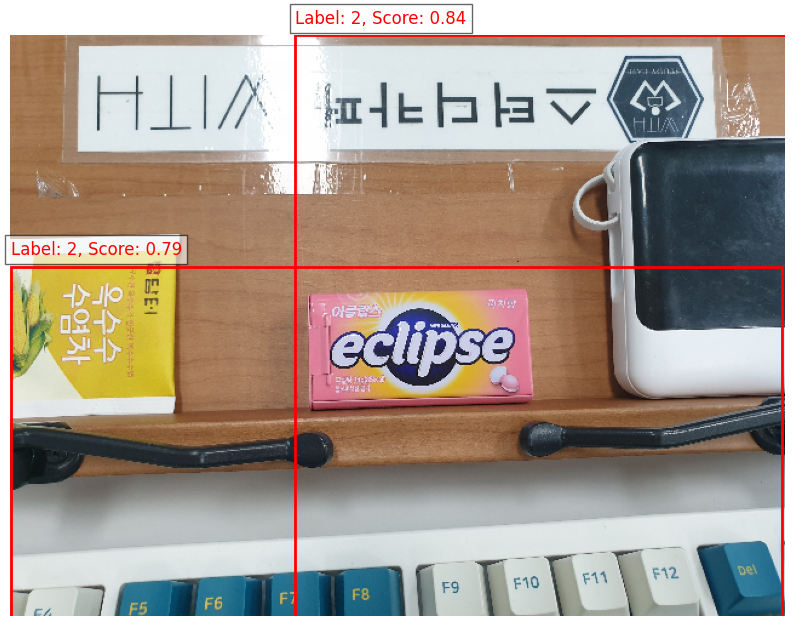

In [21]:
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# 학습된 모델 가져오기
model = YOLO("runs/detect/2nd_open_reo_8_n_1660/weights/best.pt")

# 테스트 파일
img = 'test_eclipse.jpg'

# 이미지를 읽고 크기 조정
org_image = cv2.imread(img)
resized_image = cv2.resize(org_image, (640, 480))
height, width, _ = resized_image.shape

# 모델 예측
results = model(resized_image)  # YOLO 모델을 사용하여 예측 실행

# Matplotlib을 사용한 시각화를 위한 바운딩 박스 데이터 저장
predicted_boxes = []
predicted_labels = []
predicted_scores = []

# 바운딩 박스 좌표 조정 및 데이터 수집
for result in results:
    for box in result.boxes:
        # 바운딩 박스 좌표 추출
        x_min, y_min, x_max, y_max = box.xyxy[0].tolist()

        # 좌표 값을 이미지 크기에 맞게 정수로 변환
        x_min = max(0, int(x_min))
        y_min = max(0, int(y_min))
        x_max = min(width, int(x_max))
        y_max = min(height, int(y_max))

        confidence = box.conf.item()
        label = int(box.cls.item())

        # 예측된 바운딩 박스, 레이블, 점수 저장
        predicted_boxes.append([x_min, y_min, x_max, y_max])
        predicted_labels.append(label)
        predicted_scores.append(confidence)

# Matplotlib을 사용한 시각화
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
ax = plt.gca()

# 바운딩 박스와 레이블 추가
for box, label, score in zip(predicted_boxes, predicted_labels, predicted_scores):
    x_min, y_min, x_max, y_max = box
    width, height = x_max - x_min, y_max - y_min

    # 바운딩 박스 그리기
    rect = plt.Rectangle((x_min, y_min), width, height, edgecolor='red', facecolor='none', linewidth=2)
    ax.add_patch(rect)

    # 레이블과 신뢰도 점수 추가
    plt.text(x_min, y_min - 10, f'Label: {label}, Score: {score:.2f}', color='red', fontsize=12,
             bbox=dict(facecolor='white', alpha=0.6))

plt.axis('off')
plt.show()


In [3]:
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model = YOLO('runs/detect/1st_open_reo_8_n_T4/weights/best.pt')

# Run inference 
model.predict('test_eclipse.jpg', save=True, imgsz=640, conf=0.2)


image 1/1 c:\Users\SBA\repository\image_detection\test_eclipse.jpg: 480x640 1 eclipse, 24.0ms
Speed: 2.0ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\detect\predict2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'snack', 1: 'hush', 2: 'eclipse'}
 obb: None
 orig_img: array([[[ 92, 122, 169],
         [ 87, 117, 164],
         [ 98, 131, 177],
         ...,
         [ 93, 119, 155],
         [ 98, 122, 158],
         [107, 131, 167]],
 
        [[ 90, 120, 167],
         [ 84, 114, 161],
         [ 89, 122, 168],
         ...,
         [ 98, 124, 160],
         [101, 125, 161],
         [105, 129, 165]],
 
        [[ 84, 117, 163],
         [ 83, 116, 162],
         [ 84, 117, 163],
         ...,
         [102, 128, 164],
         [103, 127, 163],
         [102, 126, 162]],
 
        ...,
 
        [[165, 178, 170],
         [166, 179, 171],
         [166, 179, 171],
         ...,
         [116, 118,  96],
         [118, 120,  98],
         [119, 121,  99]],
 
        [[164, 177, 169],
         [165, 178, 170],
         [165, 178, 170],
        